# 1. IMPORTS

In [1]:
import json
import psycopg2

import numpy    as np
import pandas   as pd
import seaborn  as sns

from IPython.display    import Image
from matplotlib         import pyplot as plt

from HelperFunctions    import jupyter_settings

In [2]:
jupyter_settings()

## 1.1. Carregando dados

In [4]:
# Lendo a query
query = open('../querys/query_01.sql', 'r').read()

# Lendo as credenciais do banco
conexoes = json.load(open('../credentials/conexoes.json', 'r'))

# Conectando no banco
conn = psycopg2.connect(
    host    =conexoes['host'],
    database=conexoes['database'],
    user    =conexoes['user'],
    password=conexoes['password']
)

# Lendo a query em um dataframe
df = pd.read_sql_query(query, conn)

# Fechando conexão
conn.close()

# Exportando dados
df.to_csv('../data/df_raw.csv', index=False, sep=';')

# 2. DESCRIÇÃO DOS DADOS

In [6]:
df = pd.read_csv('../data/df_raw.csv', sep=';')

In [7]:
df.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.00,152.00,1,< 1 Year,Yes,0,23367.00,249,0
1,13,Female,41,15.00,14.00,1,1-2 Year,No,1,31409.00,221,0
2,18,Female,25,35.00,152.00,1,< 1 Year,No,1,46622.00,299,0
3,31,Female,26,8.00,160.00,1,< 1 Year,No,0,2630.00,136,0
4,39,Male,45,8.00,124.00,1,1-2 Year,Yes,0,42297.00,264,0


## 2.1. Dimensão dos dados

In [8]:
print('Número de linhas: {}'.format(df.shape[0]))
print('Número de colunas: {}'.format(df.shape[1]))

Número de linhas: 381109
Número de colunas: 12


## 2.2. Tipo das variáveis

In [9]:
df.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

## 2.3. Verificando NAs

In [10]:
df.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

## 2.4. Balanceamento dos Dados

In [11]:
df['response'].value_counts(normalize=True).apply(lambda x: '{:.4}'.format(x))

0    0.8774
1    0.1226
Name: response, dtype: object

12.26% dos clientes têm interesse em obter o seguro para o veículo

## 2.5. Estatística Descritiva

In [12]:
num_attributes = df.select_dtypes(['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

### 2.5.1. Variáveis Numéricas

In [13]:
# Tendência central - média e mediana
tc1 = pd.DataFrame(num_attributes.apply(np.mean)).T
tc2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersão - min, max, range, média, mediana, desvio padrão, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.min)).T
d2 = pd.DataFrame(num_attributes.apply(np.max)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(np.std)).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenando dataframes
m = pd.concat([d1, d2, d3, tc1, tc2, d4, d5, d6]).T.reset_index()
m.columns = ['atributos', 'min', 'max', 'range', 'media', 'mediana', 'desvio_padrao', 'skew', 'kurtosis']

m

,atributos,min,max,range,media,mediana,desvio_padrao,skew,kurtosis
0,id,1.00,381109.00,381108.00,190555.00,190555.00,110016.69,-0.00,-1.20
1,age,20.00,85.00,65.00,38.82,36.00,15.51,0.67,-0.57
2,region_code,0.00,52.00,52.00,26.39,28.00,13.23,-0.12,-0.87
3,policy_sales_channel,1.00,163.00,162.00,112.03,133.00,54.20,-0.90,-0.97
4,driving_license,0.00,1.00,1.00,1.00,1.00,0.05,-21.60,464.35
5,previously_insured,0.00,1.00,1.00,0.46,0.00,0.50,0.17,-1.97
6,annual_premium,2630.00,540165.00,537535.00,30564.39,31669.00,17213.13,1.77,34.00
7,vintage,10.00,299.00,289.00,154.35,154.00,83.67,0.00,-1.20
8,response,0.00,1.00,1.00,0.12,0.00,0.33,2.30,3.30


In [14]:
num_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.00,190555.00,110016.84,1.00,95278.00,190555.00,285832.00,381109.00
age,381109.00,38.82,15.51,20.00,25.00,36.00,49.00,85.00
region_code,381109.00,26.39,13.23,0.00,15.00,28.00,35.00,52.00
policy_sales_channel,381109.00,112.03,54.20,1.00,29.00,133.00,152.00,163.00
driving_license,381109.00,1.00,0.05,0.00,1.00,1.00,1.00,1.00
previously_insured,381109.00,0.46,0.50,0.00,0.00,0.00,1.00,1.00
annual_premium,381109.00,30564.39,17213.16,2630.00,24405.00,31669.00,39400.00,540165.00
vintage,381109.00,154.35,83.67,10.00,82.00,154.00,227.00,299.00
response,381109.00,0.12,0.33,0.00,0.00,0.00,0.00,1.00


### 2.5.2. Variáveis Categóricas

In [15]:
cat_attributes.describe().T

,count,unique,top,freq
gender,381109,2,Male,206089
vehicle_age,381109,3,1-2 Year,200316
vehicle_damage,381109,2,Yes,192413


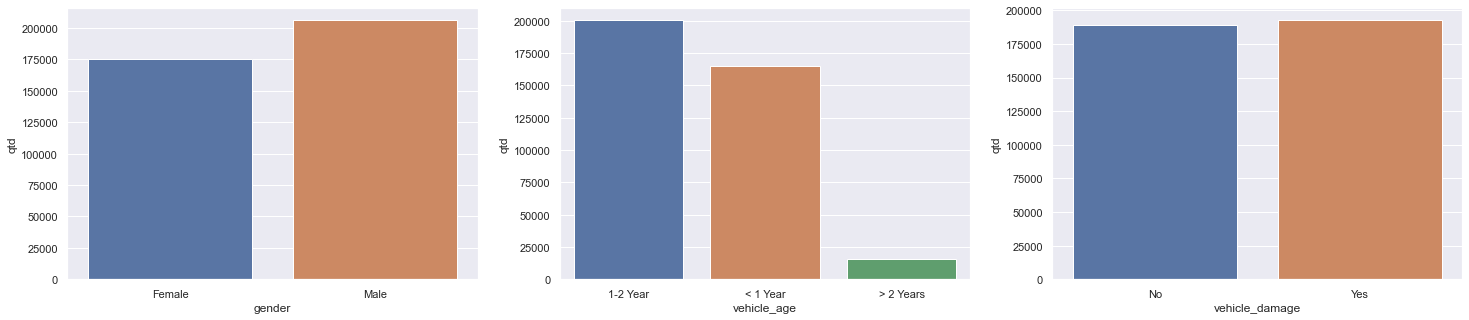

In [ ]:
# Setando tamanho dos gráficos
plt.figure(figsize=(25, 5))

# Verificando a representatividade das categorias
plt.subplot(1, 3, 1)
aux = cat_attributes[['gender', 'vehicle_age']].groupby(['gender']).count().reset_index().rename(columns={'vehicle_age': 'qtd'})
sns.barplot(x='gender', y='qtd', data=aux);

plt.subplot(1, 3, 2)
aux = cat_attributes[['vehicle_age', 'gender']].groupby(['vehicle_age']).count().reset_index().rename(columns={'gender': 'qtd'})
sns.barplot(x='vehicle_age', y='qtd', data=aux);

plt.subplot(1, 3, 3)
aux = cat_attributes[['vehicle_damage', 'vehicle_age']].groupby(['vehicle_damage']).count().reset_index().rename(columns={'vehicle_age': 'qtd'})
sns.barplot(x='vehicle_damage', y='qtd', data=aux);

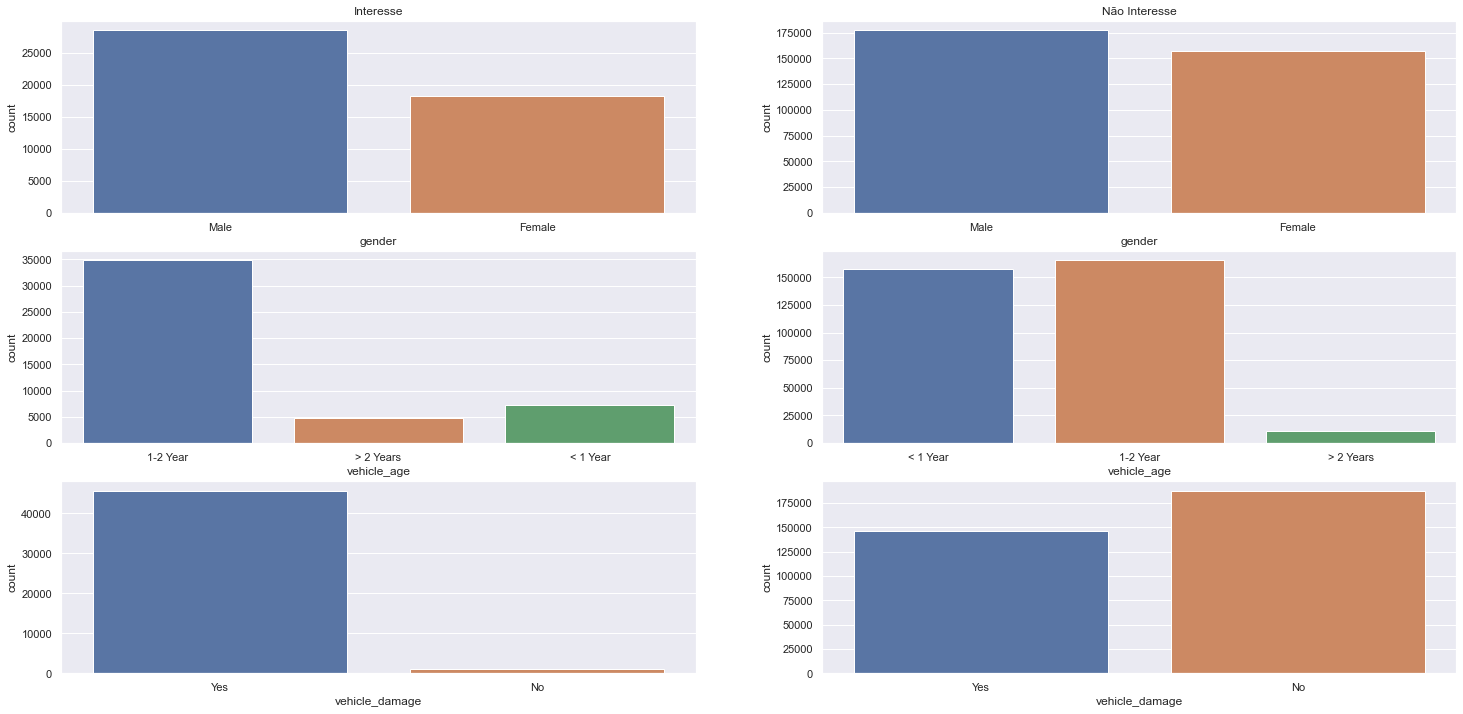

In [33]:
# Verificando as categorias em relação a variável resposta
# Interesse
aux1 = df.query('response == 1')
# Não interesse
aux2 = df.query('response != 1')

# Gender
plt.subplot(3, 2, 1)
sns.countplot(x='gender', data=aux1).set(title='Interesse');

plt.subplot(3, 2, 2)
sns.countplot(x='gender', data=aux2).set(title='Não Interesse');

# Vehicle Age
plt.subplot(3, 2, 3)
sns.countplot(x='vehicle_age', data=aux1);

plt.subplot(3, 2, 4)
sns.countplot(x='vehicle_age', data=aux2);

# Vehicle Damage
plt.subplot(3, 2, 5)
sns.countplot(x='vehicle_damage', data=aux1);

plt.subplot(3, 2, 6)
sns.countplot(x='vehicle_damage', data=aux2);

In [16]:
# Exportando dados
df.to_csv('../data/df2.csv', index=False, sep=';')

# 3. FEATURE ENGINEERING

In [3]:
df = pd.read_csv('../data/df2.csv', sep=';')

## 3.1. Mapa mental de hipóteses

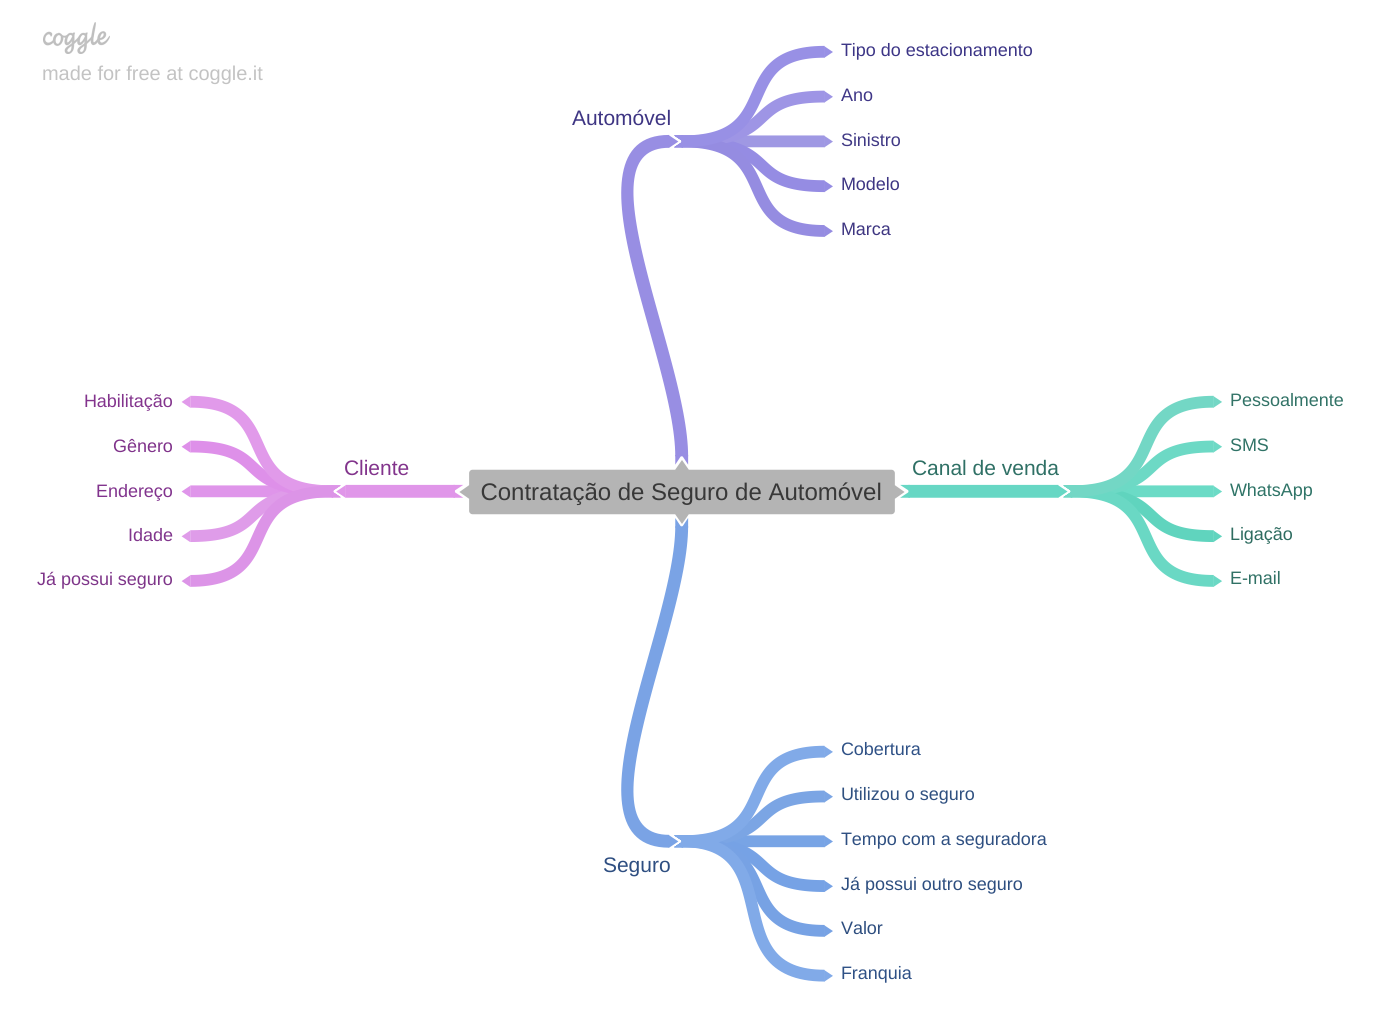

In [35]:
Image('../img/mindmap.png')

In [4]:
df.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.00,152.00,1,< 1 Year,Yes,0,23367.00,249,0
1,13,Female,41,15.00,14.00,1,1-2 Year,No,1,31409.00,221,0
2,18,Female,25,35.00,152.00,1,< 1 Year,No,1,46622.00,299,0
3,31,Female,26,8.00,160.00,1,< 1 Year,No,0,2630.00,136,0
4,39,Male,45,8.00,124.00,1,1-2 Year,Yes,0,42297.00,264,0


## 3.2. Criação das Hipóteses

### 3.2.1. Hipóteses Cliente

1. Clientes que possuem habilitação tem maior interesse na contratação do seguro

2. Pessoas do sexo masculino tem maior interesse na contratação do seguro

3. Clientes que moram em endereço com region code maior tem maior interesse na contratação do seguro

4. Clientes que possuem idade maior de 30 anos tem maior interesse na contratação do seguro

5. Clientes que já possuem seguro tem maior interesse na contratação do seguro

### 3.2.2. Hipóteses Automóvel

<s>Tipo de estacionamento</s>

1. Carros mais novos tem maior interesse na contratação do seguro

2. Carros que já possuem sinistro tem maior interesse na contratação do seguro

<s>Modelo</s>

<s>Marca</s>

### 3.2.3. Hipóteses Canal de Venda

Não possuímos classificações quanto aos canais de venda

### 3.2.4. Hipóteses Seguro

<s>Cobertua</s>

<s>Utilizou o seguro</s>

1. Clientes que estão a mais tempo com a seguradora têm maior interesse na contratação do seguro

2. Clientes que já possuem outro seguro têm maior interesse na contratação do seguro

3. Clientes que pagam um valor abaixo de 30000 anual tem maior interesse na contratação do seguro

<s>Franquia</s>

## 3.3. Lista Final de Hipóteses

1. Clientes que possuem habilitação tem maior interesse na contratação do seguro

2. Pessoas do sexo masculino tem maior interesse na contratação do seguro

3. Clientes que moram em endereço com region code maior tem maior interesse na contratação do seguro

4. Clientes que possuem idade maior de 30 anos tem maior interesse na contratação do seguro

5. Clientes que já possuem seguro tem maior interesse na contratação do seguro

6. Carros mais novos tem maior interesse na contratação do seguro

7. Carros que já possuem sinistro tem maior interesse na contratação do seguro

8. Clientes que estão a mais tempo com a seguradora têm maior interesse na contratação do seguro

9. Clientes que já possuem outro seguro têm maior interesse na contratação do seguro

10. Clientes que pagam um valor entre 25000 e 40000 anual tem maior interesse na contratação do seguro

## 3.4. Feature Engineering

In [10]:
df = df.assign(
    gender         = lambda x: x['gender'].str.lower(),
    vehicle_age    = lambda x: x['vehicle_age'].map({
        '1-2 Year': 'between_1_2_years',
        '< 1 Year': 'below_1_year',
        '> 2 Years': 'over_2_years'
    }),
    vehicle_damage = lambda x: x['vehicle_damage'].map({'Yes': 1, 'No': 0})
)

# Exportando dados
df.to_csv('../data/df3.csv', index=False, sep=';')

# 4. FILTRAGEM DE VARIÁVEIS

- Nessa etapa: <br>
    - não irei filtrar nenhuma linha, já que não encontrei nenhuma premissa a ser assumida pelo negócio.

# 5. ANÁLISE EXPLORATÓRIA DOS DADOS

In [38]:
df = pd.read_csv('../data/df3.csv', sep=';')

## 5.1. Análise Univariada

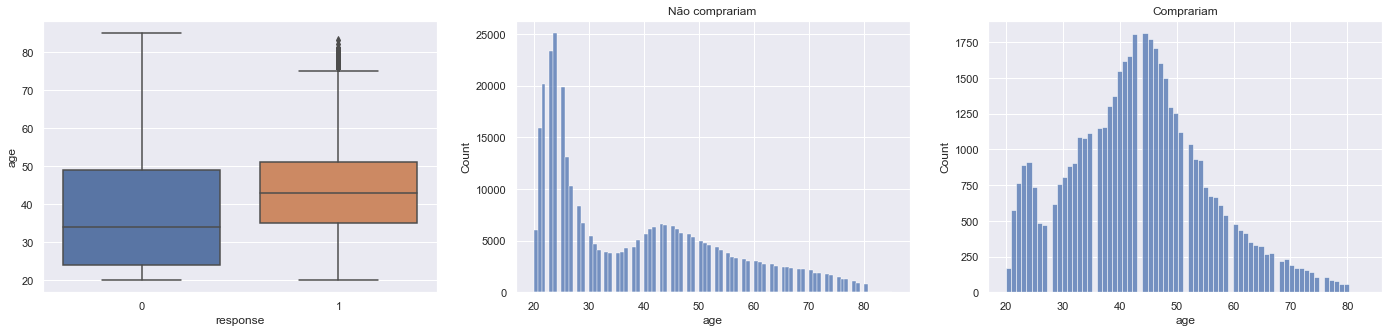

In [55]:
# 'age'
feature = 'age'

plt.figure(figsize=(24, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='response', y=feature, data=df);

plt.subplot(1, 3, 2)
plt.title('Não comprariam')
sns.histplot(df.query('response == 0')[feature]);

plt.subplot(1, 3, 3)
plt.title('Comprariam')
sns.histplot(df.query('response == 1')[feature]);

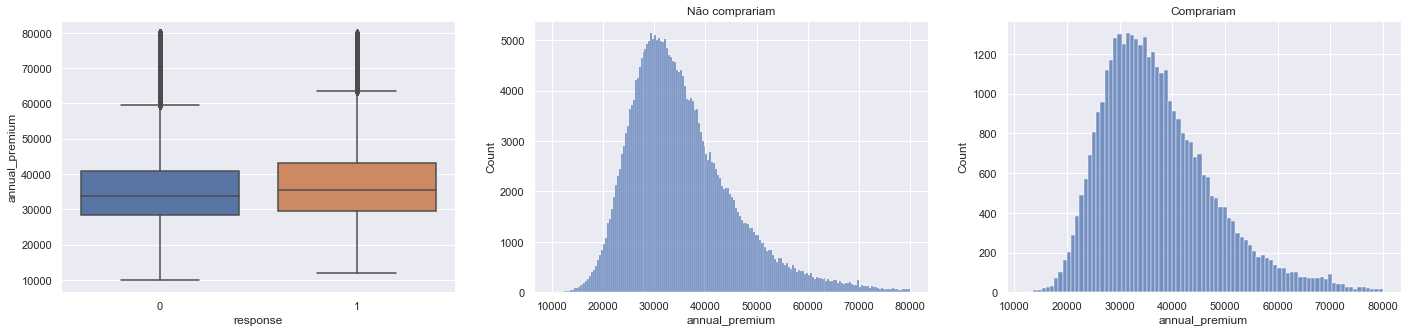

In [58]:
# 'annual_premium'
feature = 'annual_premium'
aux00 = df.query('annual_premium < 80000 & annual_premium > 10000')

plt.figure(figsize=(24, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='response', y=feature, data=aux00);

plt.subplot(1, 3, 2)
plt.title('Não comprariam')
sns.histplot(aux00.query('response == 0')[feature]);

plt.subplot(1, 3, 3)
plt.title('Comprariam')
sns.histplot(aux00.query('response == 1')[feature]);

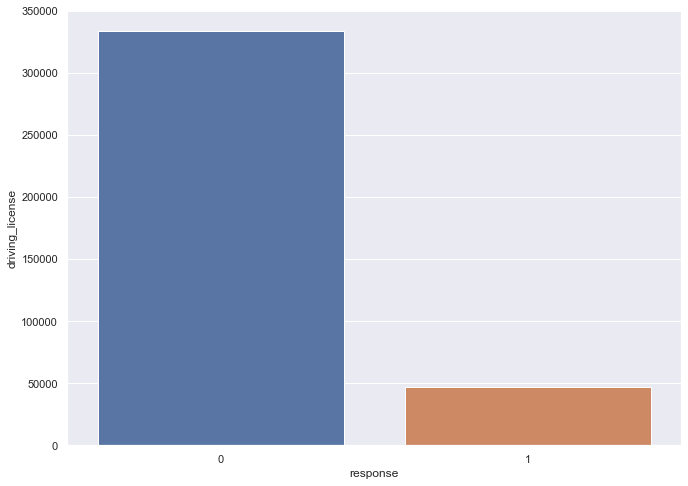

In [65]:
#driving_license'
plt.figure(figsize=(11, 8))
aux = df[['driving_license', 'response']].groupby('response').sum().reset_index()
sns.barplot(x='response', y='driving_license', data=aux);

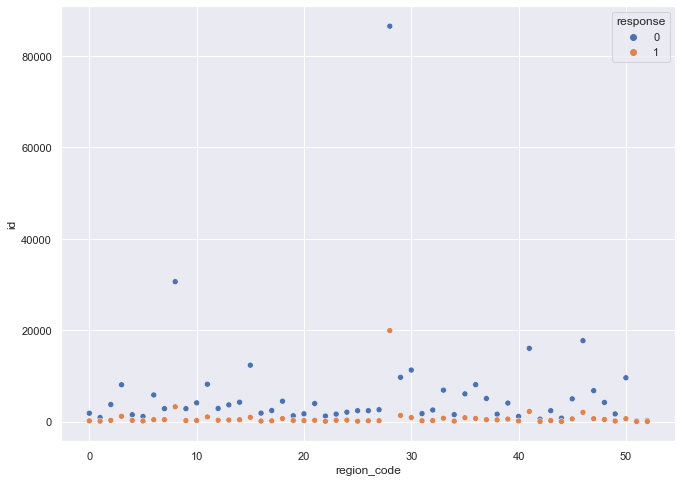

In [67]:
# 'region_code'
plt.figure(figsize=(11, 8))

aux0 = df[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
sns.scatterplot(x='region_code', y='id', hue='response', data=aux0);

In [71]:
#previously_insured'
pd.crosstab(df['previously_insured'], df['response']).apply(lambda x: x/x.sum(), axis=1)

response,0,1
previously_insured,,
0,0.77,0.23
1,1.00,0.00


In [75]:
# 'vehicle_age'
df[['vehicle_age', 'response']].value_counts(normalize=True).reset_index()

,vehicle_age,response,0
0,between_1_2_years,0,0.43
1,below_1_year,0,0.41
2,between_1_2_years,1,0.09
3,over_2_years,0,0.03
4,below_1_year,1,0.02
5,over_2_years,1,0.01


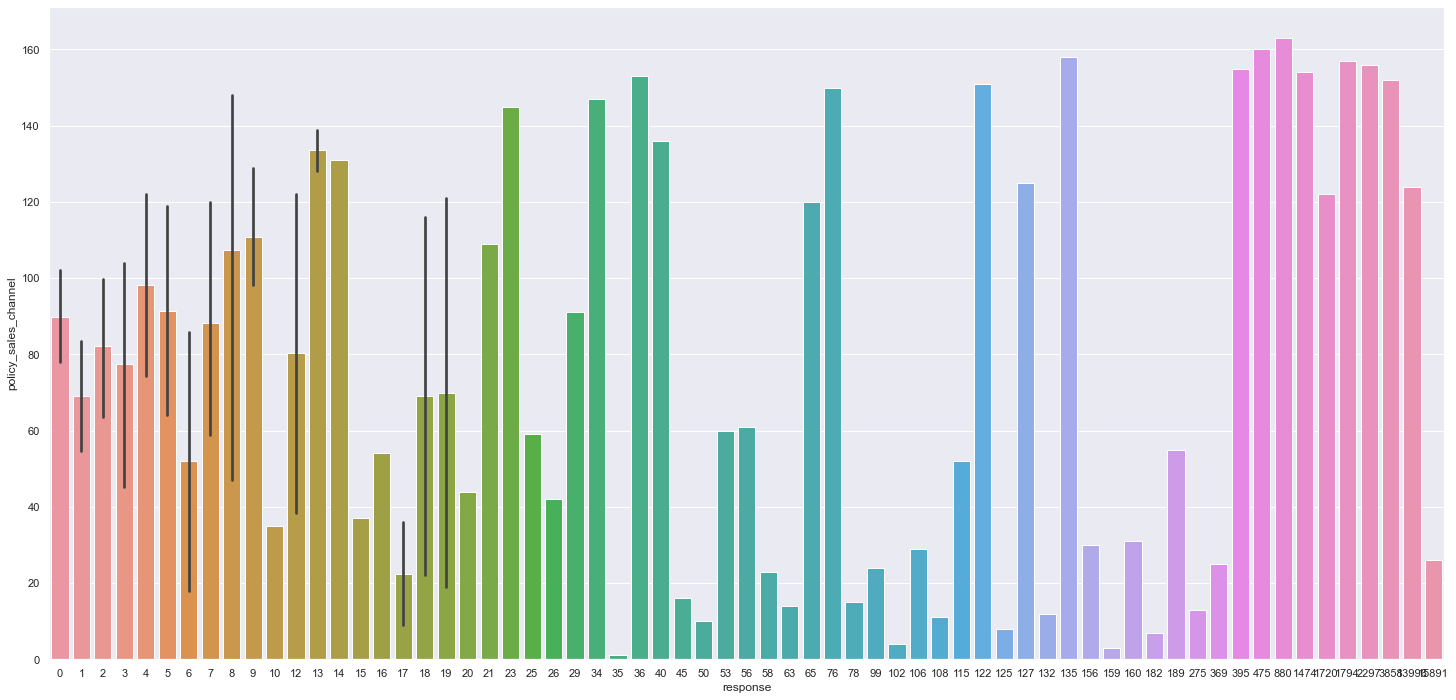

In [84]:
# 'policy_sales_channel',
aux = df[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().reset_index()
sns.barplot(x='response', y='policy_sales_channel', data=aux);

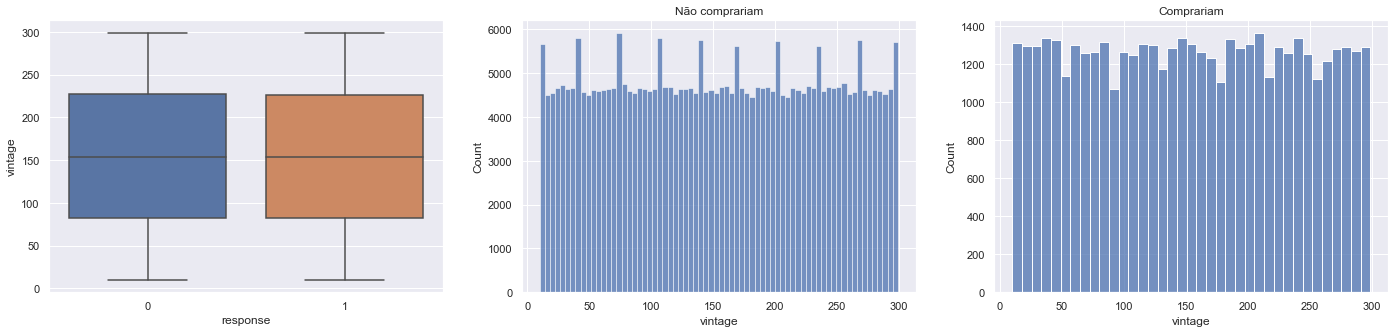

In [85]:
# 'vintage'
feature = 'vintage'

plt.figure(figsize=(24, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='response', y=feature, data=df);

plt.subplot(1, 3, 2)
plt.title('Não comprariam')
sns.histplot(df.query('response == 0')[feature]);

plt.subplot(1, 3, 3)
plt.title('Comprariam')
sns.histplot(df.query('response == 1')[feature]);

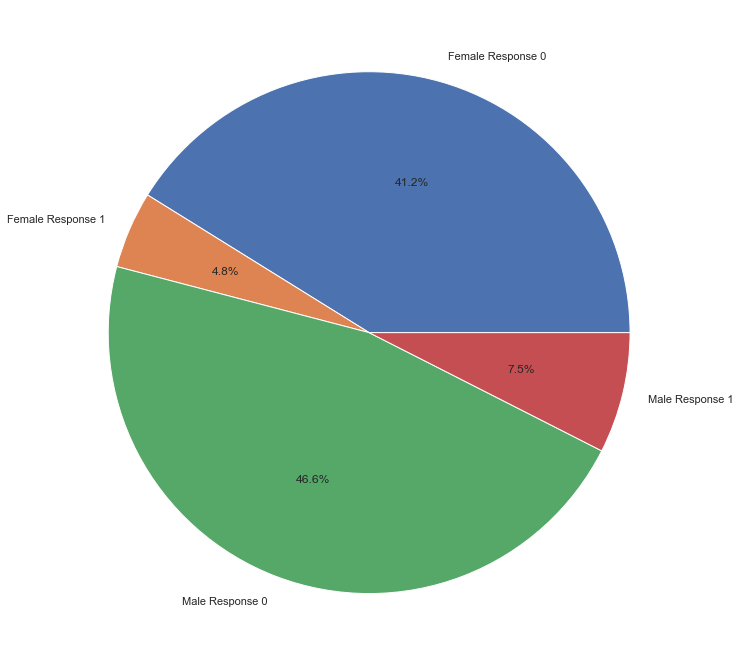

In [92]:
#'gender'
aux9 = df[['id', 'gender', 'response']].groupby(['gender','response']).count().reset_index()
aux9.columns=[['gender','response','total']]

# Gráfico de pizza
data = aux9['total'].squeeze().tolist()
labels = ['Female Response 0', 'Female Response 1', 'Male Response 0', 'Male Response 1']
plt.pie(data, labels = labels, autopct='%.1f%%')
plt.show()

In [ ]:
# 'vehicle_damage',

### 5.1.1. Variável Resposta

### 5.1.2. Variáveis Numéricas

### 5.1.3. Variáveis Categóricas

## 5.2. Análise Bivariada

## 5.3. Análise Multivariada